In [13]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
try:
# Carica il tuo file XLSX
    xlsx_file = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/dataset/richerDataset.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")                                                          
    
# Rimuovi il record con k_m2 uguale a 0
df = df[df['k_m2'] != 0]
#Rimuovi colonne Porosity tot e SSA tot
df = df.drop(['Porosity_Tot', 'SSA_Tot'], axis=1)
# Resetta gli indici del DataFrame
df.reset_index(drop=True, inplace=True)


k2_max = df['k_m2'].max()
k2_min = df['k_m2'].min()
print(df)

    Conn.Dens.  Porosity     SSA      Ech  Tortuosity          k_m2
0      310.913     0.137   5.065  -25.849      2.0340  1.473350e-12
1      310.913     0.147   5.253  -31.002      2.6650  2.254724e-12
2      310.913     0.131   4.697  -20.047      2.1090  9.543177e-12
3      350.137     0.115   5.583  -50.613      4.1830  9.664920e-13
4      350.137     0.139   7.447 -136.737      2.5950  9.180783e-13
5      350.137     0.115   5.311  -32.907      4.1010  1.435774e-12
6      368.141     0.134   6.990 -115.218      2.7740  4.010302e-13
7      368.141     0.138   7.132 -110.411      2.7790  3.937021e-12
8      368.141     0.116   5.290  -39.748      3.8680  1.933907e-12
9       10.573     0.020   0.791   -3.948      3.1000  3.021802e-13
10      10.573     0.020   0.806   -2.017      2.9000  3.190436e-13
11     458.436     0.273   7.721 -102.424      1.7170  5.516051e-11
12     458.436     0.250   6.870  -76.478      1.3530  3.822390e-11
13     458.436     0.265   7.560  -95.050      1

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)
# Crea un nuovo DataFrame con i dati scalati e riassegna le colonne non scalate
#df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Stampa il DataFrame scalato
print("DataFrame scalato:")
print(df_scaled)

DataFrame scalato:
    Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
0     0.502894  0.422383  0.449469  0.933953    0.222507  0.010982
1     0.502894  0.458484  0.469240  0.919672    0.424816  0.016905
2     0.502894  0.400722  0.410769  0.950032    0.246553  0.072152
3     0.568572  0.342960  0.503944  0.865322    0.911510  0.007140
4     0.568572  0.429603  0.699968  0.626641    0.402373  0.006773
5     0.568572  0.342960  0.475339  0.914392    0.885220  0.010697
6     0.598718  0.411552  0.651909  0.686278    0.459763  0.002854
7     0.598718  0.425993  0.666842  0.699600    0.461366  0.029657
8     0.598718  0.346570  0.473131  0.895433    0.810516  0.014473
9     0.000000  0.000000  0.000000  0.994648    0.564283  0.002104
10    0.000000  0.000000  0.001577  1.000000    0.500160  0.002232
11    0.749909  0.913357  0.728783  0.721735    0.120872  0.417936
12    0.749909  0.830325  0.639289  0.793641    0.004168  0.289555
13    0.749909  0.884477  0.711852  0.74217

Best random_state for train_test_split: 80 with R^2 score: 0.9973165672614642


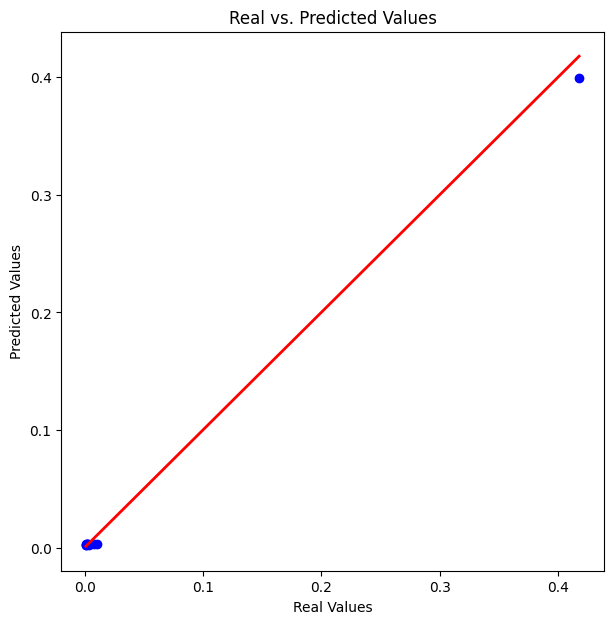

In [15]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


best_y_pred = None
best_y_test = None
best_random_state_split = None
best_score_split = -float('inf')

#Dichiarazione insieme train 'X' e test 'y'
X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']
    
for random_state in range(0, 100):

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = XGBRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    if score > best_score_split:
        best_score_split = score
        best_random_state_split = random_state
        best_y_test = y_test
        best_y_pred = y_pred

print(f"Best random_state for train_test_split: {best_random_state_split} with R^2 score: {best_score_split}")


import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred, color='blue')  # Cambia il colore dei punti in blu
plt.plot([best_y_test.min(), best_y_test.max()], [best_y_test.min(), best_y_test.max()], 'r-', lw=2)  # Bisettrice rossa non tratteggiata
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(False)  # Disabilita la griglia
plt.show()



In [5]:
print(best_y_test)
print(best_y_pred)


20    0.001381
41    0.001757
34    0.001132
42    0.007556
26    0.002038
44    0.001272
21    0.004007
27    0.003040
39    0.010879
11    0.417936
Name: k_m2, dtype: float64
[0.00203735 0.00342266 0.00250029 0.0033838  0.00274262 0.00298612
 0.00235377 0.00296821 0.00342266 0.39975727]


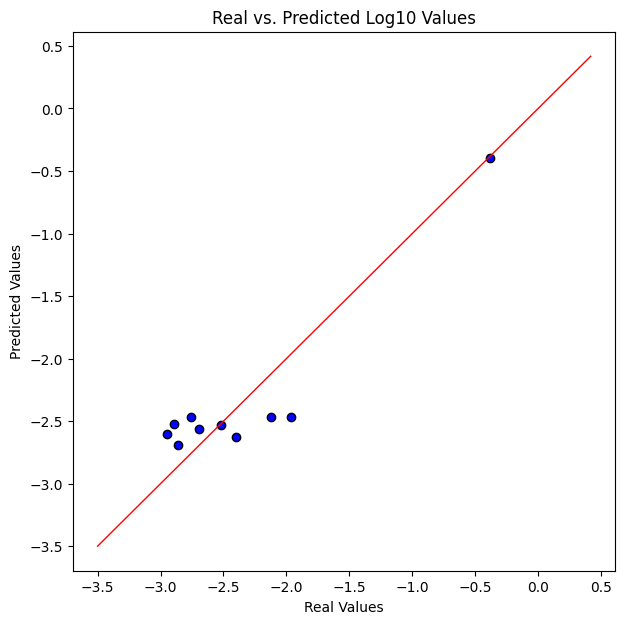

In [18]:
#Visualizzazione grafica con scala logaritmica

plt.figure(figsize=(7, 7))
plt.scatter(np.log10(best_y_test), np.log10(best_y_pred), color='blue', alpha=0.99, edgecolors='black') 
plt.plot([-3.5, best_y_test.max()], [-3.5, best_y_test.max()], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Log10 Values')
plt.grid(False)
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from tqdm import tqdm
import joblib

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.15, 0.3],  
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9, 1],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.1, 0.2],
    'lambda': [0, 0.01, 0.1, 1],
    'alpha': [0, 0.01, 0.1, 1]
}

best_params = {
    'colsample_bytree': 0.7,
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 50,
    'subsample': 0.7
}


X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state_split)

model = XGBRegressor(random_state=best_random_state_split)


# Integra tqdm con joblib per mostrare la progress bar
tqdm_callback = lambda iterable: tqdm(
    iterable, 
    total=len(param_grid['n_estimators']) * len(param_grid['learning_rate']) * len(param_grid['max_depth']) * len(param_grid['subsample']) * len(param_grid['colsample_bytree']), 
    desc="Hyperparameter tuning"
)

# Usa joblib per patchare il parallel computing di scikit-learn
with joblib.parallel_backend('loky', inner_max_num_threads=1):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"R^2 score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")


Fitting 5 folds for each of 55296 candidates, totalling 276480 fits
Best parameters found: {'alpha': 0, 'colsample_bytree': 0.7, 'gamma': 0, 'lambda': 0.1, 'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
R^2 score: 0.9972107879122231
MSE: 4.310540856361242e-05
MAE: 0.0036313699345814016


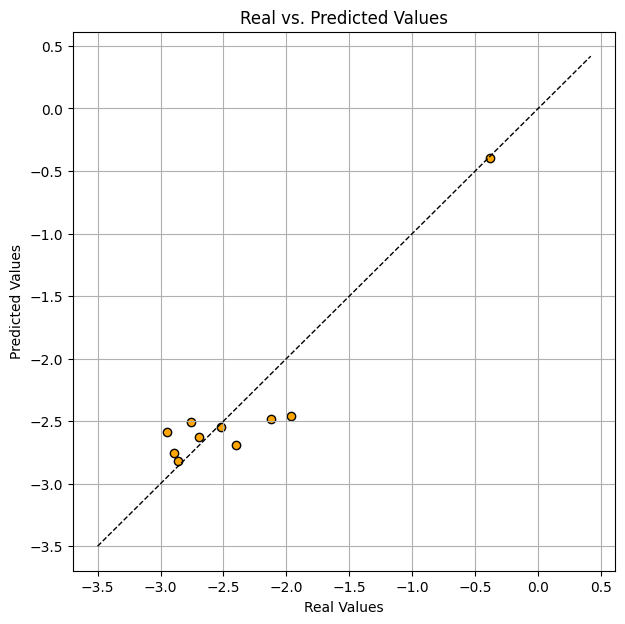

In [8]:
#Visualizzazione grafica con scala logaritmica

plt.figure(figsize=(7, 7))
plt.scatter(np.log10(y_test), np.log10(y_pred), color='orange', alpha=0.99, edgecolors='black') 
plt.plot([-3.5, y_test.max()], [-3.5, y_test.max()], 'k--', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()

In [9]:
# Crea un DataFrame con i valori reali e predetti
results_df = pd.DataFrame({
    'Valori Reali': y_test,
    'Valori Predetti': y_pred
})

# Stampa il DataFrame
print("\nValori Reali vs Valori Predetti:\n")
print(results_df)


Valori Reali vs Valori Predetti:

    Valori Reali  Valori Predetti
20      0.001381         0.001508
41      0.001757         0.003114
34      0.001132         0.002568
42      0.007556         0.003274
26      0.002038         0.002376
44      0.001272         0.001750
21      0.004007         0.002037
27      0.003040         0.002821
39      0.010879         0.003470
11      0.417936         0.399237


Best random_state for train_test_split: 80 with R^2 score: 0.9978139509160755


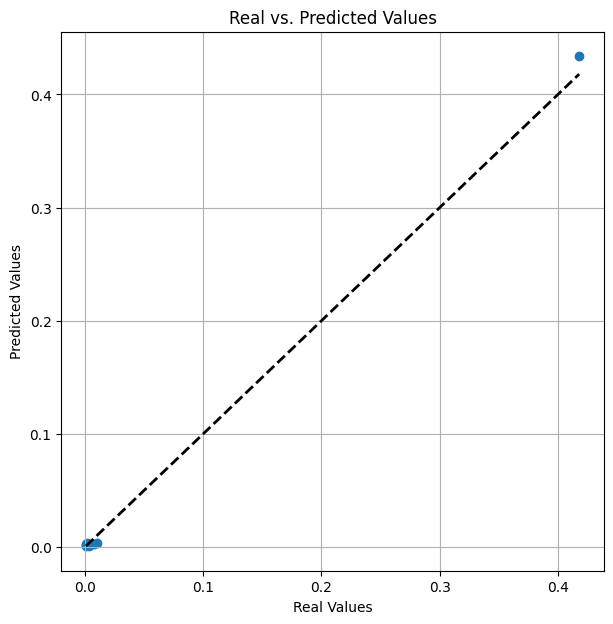

In [10]:
#Con gli iperparametri migliori trovati, riaddestro il modello sul miglior random state per train_test_split

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


best_y_pred = None
best_y_test = None
best_random_state_split = None
best_score_split = -float('inf')

#Dichiarazione insieme train 'X' e test 'y'
X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']
    
for random_state in range(0, 100):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = XGBRegressor(
        alpha= 0,
        colsample_bytree= 0.7,
        gamma= 0,
        learning_rate= 0.3,
        max_depth= 7,
        reg_lambda = 0.1,
        min_child_weight = 1,
        n_estimators= 100,
        subsample= 0.9
    )
    
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    if score > best_score_split:
        best_score_split = score
        best_random_state_split = random_state
        best_y_pred = y_pred
        best_y_test = y_test

print(f"Best random_state for train_test_split: {best_random_state_split} with R^2 score: {best_score_split}")
plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred)
plt.plot([best_y_test.min(), best_y_test.max()], [best_y_test.min(), best_y_test.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()



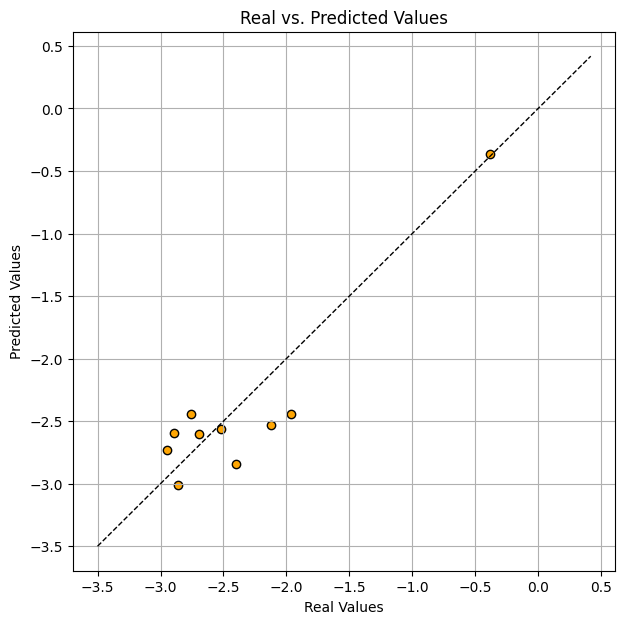

In [11]:
#Visualizzo in Log10

plt.figure(figsize=(7, 7))
plt.scatter(np.log10(best_y_test), np.log10(best_y_pred), color='orange', alpha=0.99, edgecolors='black') 
plt.plot([-3.5, best_y_test.max()], [-3.5, best_y_test.max()], 'k--', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()

In [12]:
# Crea un DataFrame con i valori reali e predetti
results_df = pd.DataFrame({
    'Valori Reali': best_y_test,
    'Valori Predetti': best_y_pred
})

# Stampa il DataFrame
print("\nValori Reali vs Valori Predetti:\n")
print(results_df)


Valori Reali vs Valori Predetti:

    Valori Reali  Valori Predetti
20      0.001381         0.000984
41      0.001757         0.003632
34      0.001132         0.001876
42      0.007556         0.002929
26      0.002038         0.002494
44      0.001272         0.002541
21      0.004007         0.001444
27      0.003040         0.002735
39      0.010879         0.003632
11      0.417936         0.433786
